In [1]:
from sklearn.preprocessing import StandardScaler
def normalize(data, boundary):
    scaler = StandardScaler()
    scaler.fit(data[:boundary])
    ndata = scaler.transform(data)
    return ndata

In [2]:
#Building the time series dataset 
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

def modelfn(df, use_sentiment=False):
    input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
    if(use_sentiment==True):
        print('Using sentiment..')
        input_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score']].values 
    targets = df['Return'].values
    T = 10                            #Time window for getting sequences for the autoregressive RNN model
    D = input_data.shape[1]
    N = len(input_data) - T
    ntrain = len(input_data) * 4 // 5  #80% data is for training, 20% is for validating
    input_data = normalize(input_data, ntrain+T)

    #Train set
    import numpy as np
    X_train = np.zeros((ntrain, T, D))
    Y_train = np.zeros(ntrain)
    for t in range(ntrain):
        X_train[t, :, :] = input_data[t:t+T]
        Y_train[t] = (targets[t+T] > 0)

    #Test set
    X_test = np.zeros((N-ntrain, T, D))
    Y_test = np.zeros(N-ntrain)
    for v in range(N-ntrain):
        t = v + ntrain
        X_test[v, :, :] = input_data[t:t+T]
        Y_test[v] = (targets[t+T] > 0)

    i = keras.layers.Input((T, D))
    h = keras.layers.LSTM(50)(i)
    o = keras.layers.Dense(1, activation='sigmoid')(h)
    fmodel = keras.models.Model(i,o)
    fmodel.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

    res = fmodel.fit(X_train, Y_train, batch_size=32, epochs=300, validation_data=(X_test, Y_test))

    plt.plot(res.history['loss'], label='Train error')
    plt.plot(res.history['val_loss'], label='Test error')
    plt.legend()
    plt.show()
    plt.plot(res.history['accuracy'], label='Train accuracy')
    plt.plot(res.history['val_accuracy'], label='Test accuracy')
    plt.legend()
    plt.show()
    return (fmodel, X_train, X_test, Y_test)


In [9]:
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df =  pd.read_csv('data/AAPL_with_sentiment.csv')
df['PrevClose'] = df['Close'].shift(1)
df['Return'] = (df['Close'] - df['PrevClose'])/df['PrevClose']
df_ns = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
df_s = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score', 'Return']]

Epoch 1/300
7/7 [==============================] - 1s 105ms/step - loss: 0.6985 - accuracy: 0.4776 - val_loss: 0.6931 - val_accuracy: 0.5610
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6857 - accuracy: 0.5771 - val_loss: 0.6951 - val_accuracy: 0.5122
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.5920 - val_loss: 0.7018 - val_accuracy: 0.5122
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.5871 - val_loss: 0.7077 - val_accuracy: 0.5122
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6742 - accuracy: 0.5920 - val_loss: 0.7061 - val_accuracy: 0.5122
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6737 - accuracy: 0.5970 - val_loss: 0.6959 - val_accuracy: 0.5122
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6732 - accuracy: 0.5970 - val_loss: 0.6943 - val_accuracy: 0.5122
Epoch 8/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.6596 - accuracy: 0.5871 - val_loss: 0.6851 - val_accuracy: 0.5122
Epoch 60/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6604 - accuracy: 0.6020 - val_loss: 0.6899 - val_accuracy: 0.5122
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6559 - accuracy: 0.6020 - val_loss: 0.6922 - val_accuracy: 0.5122
Epoch 62/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6557 - accuracy: 0.5920 - val_loss: 0.6893 - val_accuracy: 0.5122
Epoch 63/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6561 - accuracy: 0.5920 - val_loss: 0.6876 - val_accuracy: 0.5122
Epoch 64/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6557 - accuracy: 0.6070 - val_loss: 0.6804 - val_accuracy: 0.5854
Epoch 65/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.5970 - val_loss: 0.6821 - val_accuracy: 0.5122
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.6269 - val_loss: 0.7012 - val_accuracy: 0.5122
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.6269 - val_loss: 0.7017 - val_accuracy: 0.5122
Epoch 119/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6300 - accuracy: 0.6119 - val_loss: 0.6955 - val_accuracy: 0.5122
Epoch 120/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6377 - accuracy: 0.6119 - val_loss: 0.6935 - val_accuracy: 0.5122
Epoch 121/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6322 - accuracy: 0.6269 - val_loss: 0.6914 - val_accuracy: 0.5122
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6299 - accuracy: 0.6318 - val_loss: 0.6900 - val_accuracy: 0.5122
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6320 - accuracy: 0.6418 - val_loss: 0.6916 - val_accuracy: 0.5122
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.6040 - accuracy: 0.6567 - val_loss: 0.7012 - val_accuracy: 0.4878
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.6567 - val_loss: 0.6985 - val_accuracy: 0.5122
Epoch 177/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6089 - accuracy: 0.6617 - val_loss: 0.6986 - val_accuracy: 0.4878
Epoch 178/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6060 - accuracy: 0.6567 - val_loss: 0.7006 - val_accuracy: 0.4878
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6077 - accuracy: 0.6468 - val_loss: 0.7017 - val_accuracy: 0.4878
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6046 - accuracy: 0.6716 - val_loss: 0.7009 - val_accuracy: 0.4878
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6047 - accuracy: 0.6667 - val_loss: 0.6995 - val_accuracy: 0.5122
Epoch 182/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.5744 - accuracy: 0.6617 - val_loss: 0.7247 - val_accuracy: 0.5122
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5778 - accuracy: 0.6915 - val_loss: 0.7240 - val_accuracy: 0.5122
Epoch 235/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5731 - accuracy: 0.6965 - val_loss: 0.7267 - val_accuracy: 0.5122
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5706 - accuracy: 0.6915 - val_loss: 0.7233 - val_accuracy: 0.5122
Epoch 237/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.7015 - val_loss: 0.7235 - val_accuracy: 0.5122
Epoch 238/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.7065 - val_loss: 0.7269 - val_accuracy: 0.5122
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5712 - accuracy: 0.7065 - val_loss: 0.7329 - val_accuracy: 0.5122
Epoch 240/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.5381 - accuracy: 0.7065 - val_loss: 0.7767 - val_accuracy: 0.5122
Epoch 292/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.7015 - val_loss: 0.7814 - val_accuracy: 0.5366
Epoch 293/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5316 - accuracy: 0.7313 - val_loss: 0.7827 - val_accuracy: 0.5122
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7164 - val_loss: 0.7797 - val_accuracy: 0.5366
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5277 - accuracy: 0.7114 - val_loss: 0.7808 - val_accuracy: 0.5122
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7065 - val_loss: 0.7809 - val_accuracy: 0.5122
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5278 - accuracy: 0.7214 - val_loss: 0.7837 - val_accuracy: 0.5366
Epoch 298/300
7/7 [========

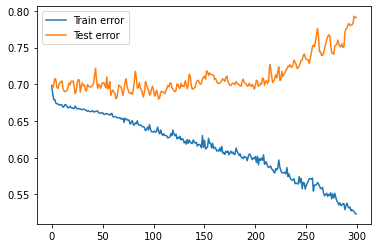

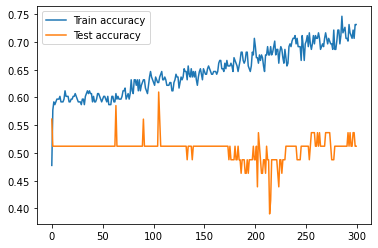

In [10]:
#Without sentiment
fmodelns, X_train_ns, X_test_ns, Y_test_ns = modelfn(df, use_sentiment=False)

Using sentiment..
Epoch 1/300
7/7 [==============================] - 0s 66ms/step - loss: 0.6901 - accuracy: 0.5672 - val_loss: 0.7050 - val_accuracy: 0.5122
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.5970 - val_loss: 0.7018 - val_accuracy: 0.5122
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.6020 - val_loss: 0.7085 - val_accuracy: 0.5122
Epoch 4/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6724 - accuracy: 0.5970 - val_loss: 0.7096 - val_accuracy: 0.5122
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.6020 - val_loss: 0.7177 - val_accuracy: 0.5122
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6704 - accuracy: 0.6020 - val_loss: 0.7185 - val_accuracy: 0.5122
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.6020 - val_loss: 0.7164 - val_accuracy: 0.5122
Epoch 8/

7/7 [==============================] - 0s 6ms/step - loss: 0.6483 - accuracy: 0.6070 - val_loss: 0.7214 - val_accuracy: 0.4390
Epoch 60/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6460 - accuracy: 0.6169 - val_loss: 0.7233 - val_accuracy: 0.4390
Epoch 61/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6169 - val_loss: 0.7192 - val_accuracy: 0.4390
Epoch 62/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6465 - accuracy: 0.6070 - val_loss: 0.7220 - val_accuracy: 0.4390
Epoch 63/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6454 - accuracy: 0.5970 - val_loss: 0.7241 - val_accuracy: 0.4390
Epoch 64/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.6070 - val_loss: 0.7308 - val_accuracy: 0.4878
Epoch 65/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6448 - accuracy: 0.6169 - val_loss: 0.7362 - val_accuracy: 0.4878
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.7065 - val_loss: 0.8678 - val_accuracy: 0.2439
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5784 - accuracy: 0.6766 - val_loss: 0.8764 - val_accuracy: 0.3171
Epoch 119/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5724 - accuracy: 0.6816 - val_loss: 0.8765 - val_accuracy: 0.3171
Epoch 120/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.6866 - val_loss: 0.8825 - val_accuracy: 0.2927
Epoch 121/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.6965 - val_loss: 0.8804 - val_accuracy: 0.2439
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5655 - accuracy: 0.6965 - val_loss: 0.8766 - val_accuracy: 0.2927
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5636 - accuracy: 0.7114 - val_loss: 0.8761 - val_accuracy: 0.2683
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.4558 - accuracy: 0.7861 - val_loss: 1.1032 - val_accuracy: 0.2927
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4535 - accuracy: 0.7811 - val_loss: 1.0864 - val_accuracy: 0.3171
Epoch 177/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4518 - accuracy: 0.7910 - val_loss: 1.1200 - val_accuracy: 0.3902
Epoch 178/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4570 - accuracy: 0.7662 - val_loss: 1.1411 - val_accuracy: 0.3902
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4467 - accuracy: 0.7960 - val_loss: 1.1455 - val_accuracy: 0.3902
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4471 - accuracy: 0.8010 - val_loss: 1.1561 - val_accuracy: 0.3902
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4451 - accuracy: 0.7910 - val_loss: 1.1510 - val_accuracy: 0.3659
Epoch 182/300
7/7 [========

Epoch 233/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3626 - accuracy: 0.8408 - val_loss: 1.2492 - val_accuracy: 0.3415
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3700 - accuracy: 0.8159 - val_loss: 1.2161 - val_accuracy: 0.3902
Epoch 235/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3573 - accuracy: 0.8358 - val_loss: 1.2462 - val_accuracy: 0.4146
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3521 - accuracy: 0.8308 - val_loss: 1.2879 - val_accuracy: 0.4146
Epoch 237/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.8308 - val_loss: 1.2942 - val_accuracy: 0.3902
Epoch 238/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3542 - accuracy: 0.8308 - val_loss: 1.2500 - val_accuracy: 0.4390
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.8209 - val_loss: 1.2362 - val_accuracy: 0.3902
Epoch 240/300

7/7 [==============================] - 0s 6ms/step - loss: 0.3036 - accuracy: 0.8507 - val_loss: 1.3226 - val_accuracy: 0.5366
Epoch 292/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2952 - accuracy: 0.8507 - val_loss: 1.2901 - val_accuracy: 0.5122
Epoch 293/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.8607 - val_loss: 1.2603 - val_accuracy: 0.5366
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.8756 - val_loss: 1.2230 - val_accuracy: 0.5610
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2738 - accuracy: 0.8706 - val_loss: 1.2516 - val_accuracy: 0.5610
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.8607 - val_loss: 1.2803 - val_accuracy: 0.5854
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 0.8706 - val_loss: 1.2993 - val_accuracy: 0.5122
Epoch 298/300
7/7 [========

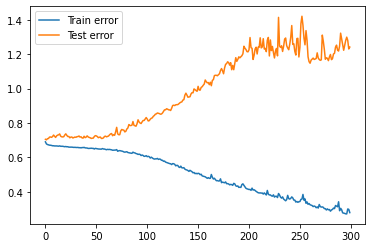

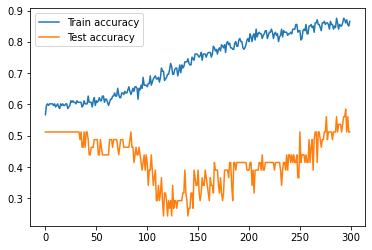

In [11]:
#With sentiment
fmodels, X_train_s, X_test_s, Y_test_s = modelfn(df, use_sentiment=True)

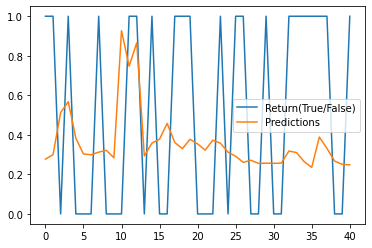

Precision:  0.55
Recall:  0.5214285714285715
F1 score:  0.4368131868131868
Accuracy:  0.5121951219512195


In [12]:
#Without Sentiment
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import numpy as np
outputs_ns = fmodelns.predict(X_test_ns)
predictions_ns = outputs_ns[:, 0]
plt.plot(Y_test_ns, label='Return(True/False)')
plt.plot(predictions_ns, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_ns > 0.5
print('Precision: ', precision_score(Y_test_ns, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_ns, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_ns, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_ns, y_pred))

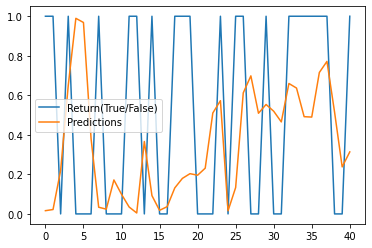

Precision:  0.5166666666666666
Recall:  0.5154761904761904
F1 score:  0.5048309178743962
Accuracy:  0.5121951219512195


In [13]:
#With Sentiment
outputs_s = fmodels.predict(X_test_s)
predictions_s = outputs_s[:, 0]
plt.plot(Y_test_s, label='Return(True/False)')
plt.plot(predictions_s, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_s > 0.5
print('Precision: ', precision_score(Y_test_s, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_s, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_s, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_s, y_pred))